In [1]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import kagglehub
import shutil

In [2]:
def augmentation_image(image_path):
    image_bgr = cv2.imread(image_path)
    augmented = image_bgr.copy()
    h, w = image_bgr.shape[:2]

    # Danh sách các biến đổi khả thi
    transformations = ['rotate', 'flip', 'shift', 'scale', 'brightness', 'noise']
    
    # Chọn ngẫu nhiên ít nhất 3 biến đổi
    num_transforms = random.randint(3, len(transformations))
    chosen = random.sample(transformations, num_transforms)

    for t in chosen:
        if t == 'rotate':
            angle = random.uniform(-90, 90)  # xoay -90 đến 90 độ
            M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
            #augmented = cv2.warpAffine(augmented, M, (w, h))
            augmented = cv2.warpAffine(augmented, M, (w, h), borderMode=cv2.BORDER_REFLECT)
            # k = random.choice([0, 1, 2, 3])  # số lần xoay 90 độ
            # if k == 0:
            #     return img
            # elif k == 1:
            #     return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            # elif k == 2:
            #     return cv2.rotate(img, cv2.ROTATE_180)
            # else:  # k == 3
            #     return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

        elif t == 'flip':
            flip_code = random.choice([-1, 0, 1])  # ngang, dọc, cả hai
            augmented = cv2.flip(augmented, flip_code)

        elif t == 'shift':
            tx = random.randint(-20, 20)
            ty = random.randint(-20, 20)
            M = np.float32([[1, 0, tx], [0, 1, ty]])
            augmented = cv2.warpAffine(augmented, M, (w, h))

        elif t == 'scale':
            fx = random.uniform(0.8, 1.2)
            fy = random.uniform(0.8, 1.2)
            augmented = cv2.resize(augmented, None, fx=fx, fy=fy)

            # Resize lại về kích thước gốc
            augmented = cv2.resize(augmented, (w, h))

        elif t == 'brightness':
            alpha = random.uniform(0.8, 1.2)  # contrast
            beta = random.randint(-30, 30)    # brightness
            augmented = cv2.convertScaleAbs(augmented, alpha=alpha, beta=beta)

        elif t == 'noise':
            noise = np.random.normal(0, 20, augmented.shape).astype(np.int16)
            augmented = augmented.astype(np.int16) + noise
            augmented = np.clip(augmented, 0, 255).astype(np.uint8)

    return augmented

In [3]:
base_dir = r'/kaggle/input/data-augmentation/Lymphocite'
image_path = base_dir + '/kaggle/input/data-augmentation/Lymphocite/1.JPG'

# Import Dataset & Test

Kích thước ảnh: (640, 640, 3)
Kiểu dữ liệu: uint8


(-0.5, 639.5, 639.5, -0.5)

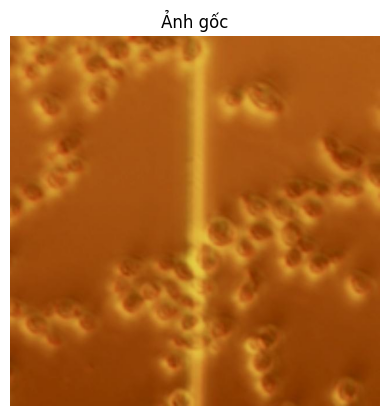

In [4]:
# Lấy danh sách ảnh trong thư mục test
image_files = [f for f in os.listdir(base_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))]

# Chọn 1 ảnh đầu tiên để test
if not image_files:
    raise FileNotFoundError("Không tìm thấy ảnh nào trong thư mục test/")
    
image_path = os.path.join(base_dir, image_files[1])

# Đọc ảnh gốc
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

print(f"Kích thước ảnh: {image_bgr.shape}")
print(f"Kiểu dữ liệu: {image_bgr.dtype}")

plt.imshow(image_rgb)
plt.title(f"Ảnh gốc")
plt.axis("off")

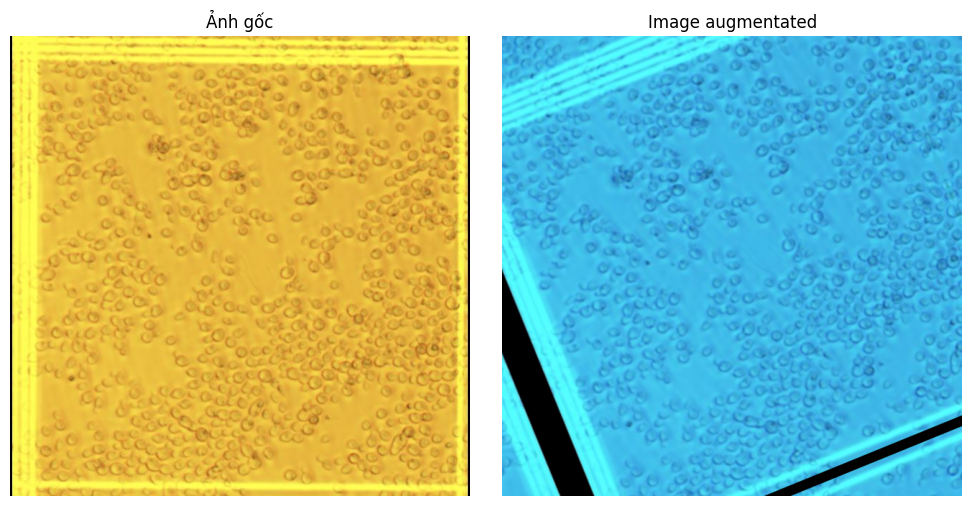

In [5]:
#augmentation
image_path = os.path.join(base_dir, image_files[0])
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
aug_img = augmentation_image(image_path)

# Hiển thị ảnh gốc
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title(f"Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(aug_img)
plt.title('Image augmentated')
plt.axis('off')

plt.tight_layout()
plt.show()

# Create augmented image into folder

In [6]:
output_dir = "augmentation_image"
os.makedirs(output_dir, exist_ok=True)

In [7]:
for img_name in image_files:
    img_path = os.path.join(base_dir, img_name)

    for i in range(3):
        aug_img = augmentation_image(img_path)

        # Lưu ảnh augmented
        save_name = f"{os.path.splitext(img_name)[0]}_{i+1}.jpg"
        save_path = os.path.join(output_dir, save_name)
        cv2.imwrite(save_path, aug_img)

print("Augmentation hoàn tất, ảnh đã lưu trong folder:", output_dir)

Augmentation hoàn tất, ảnh đã lưu trong folder: augmentation_image


In [8]:
#Up load model
LOCAL_DATASET_DIR = "/kaggle/working/augmentation_image"

shutil.make_archive("augmentation_image", "zip", LOCAL_DATASET_DIR)

kagglehub.login()

DATASET_SLUG = "lymphocyte-augmentation"

kagglehub.dataset_upload(
    handle=f"giahuytranviet/{DATASET_SLUG}",
    local_dataset_dir=LOCAL_DATASET_DIR,
    version_notes="Dataset augmented từ 35 ảnh gốc, mỗi ảnh sinh thêm 3 ảnh."
)

print("Dataset đã upload thành công lên Kaggle Hub.")

Uploading Dataset https://www.kaggle.com/datasets/giahuytranviet/lymphocyte-augmentation ...
More than 50 files detected, creating a zip archive...
Starting upload for file /tmp/tmpo8o6p1fo/archive.zip


Uploading: 100%|██████████| 20.2M/20.2M [00:01<00:00, 11.8MB/s]

Upload successful: /tmp/tmpo8o6p1fo/archive.zip (19MB)


Your dataset has been created.
Files are being processed...
See at: https://www.kaggle.com/datasets/giahuytranviet/lymphocyte-augmentation
Dataset đã upload thành công lên Kaggle Hub.
